## Bosques aleatorios: introducción

In [1]:
%autosave 0
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.ensemble import RandomForestClassifier


Autosave disabled


## Ejercicio 1: estructura de un bosque

Empezamos con un ejercicio de datos sintéticos de tres clases:

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 400, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, n_classes=2,
                           class_sep = 0.3,
                           random_state = 2182)

In [3]:
datos_df = pd.DataFrame(X)
datos_df.columns = ["x1", "x2"]
datos_df["y"] = y
datos_df

,x1,x2,y
0,-0.462733,-0.126876,0
1,-0.411505,-1.404907,1
2,-0.265528,-0.824776,0
3,-0.327397,-0.457609,0
4,-0.331817,-0.032972,0
...,...,...,...
395,1.098544,-0.642720,1
396,-0.634882,-0.724670,1
397,-0.245840,-0.686579,0
398,0.169786,0.774282,0


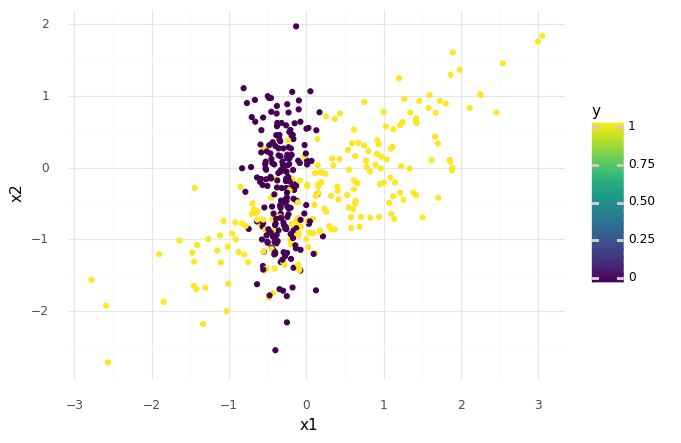

<ggplot: (8749567270173)>

In [4]:
(ggplot(datos_df, aes(x="x1", y="x2", color = "y")) + geom_point() + theme_minimal())

In [5]:
bosque_clf = RandomForestClassifier(n_estimators = 1000, max_features = 1)

# Ajustar modelo
bosque_clf_fit = bosque_clf.fit(X[1:200, ], y[1:200])
bosque_clf_fit

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Podemos obtener los árboles individuales haciendo:

In [6]:
arboles = bosque_clf_fit.estimators_
len(arboles)

1000

Examinamos un árbol. En general, en árboles aleatorios
construimos árboles grandes

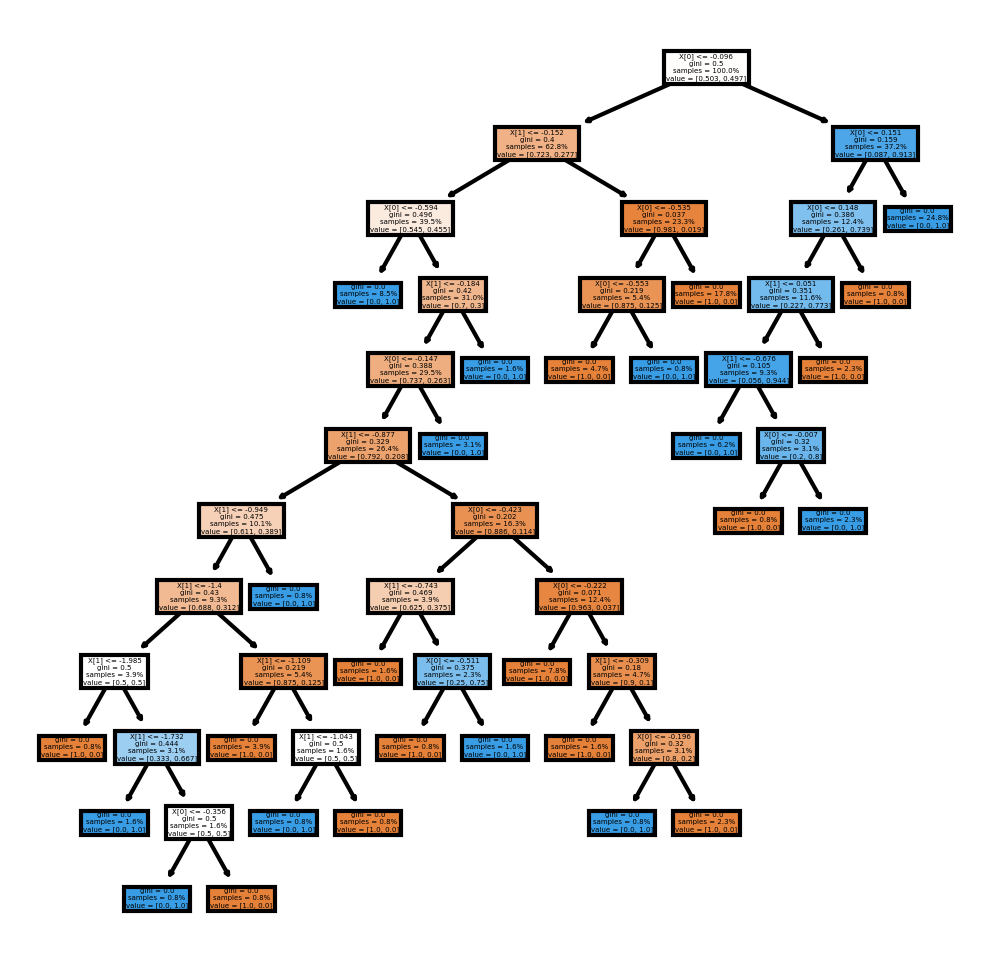

In [7]:
from sklearn import tree
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 1, figsize = (4,4), dpi = 300)
anotacion = tree.plot_tree(arboles[1], ax = ax,
                           filled = True, 
                           proportion = True)

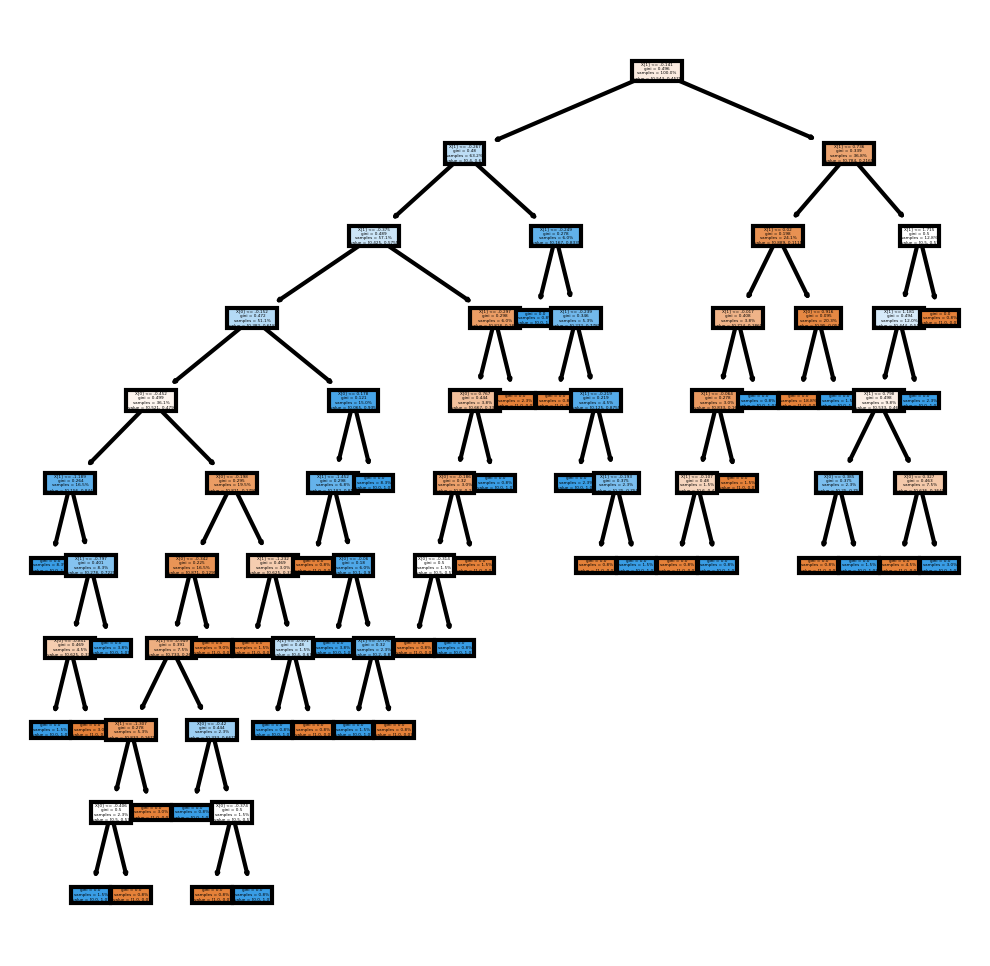

In [8]:
fig, ax = plt.subplots(1, 1, figsize = (4,4), dpi = 300)
anotacion = tree.plot_tree(arboles[3], ax = ax,
                           filled = True, 
                           proportion = True)

In [9]:
# Nótese que en muchos de estos árboles los nodos son puros,
# gracias a la flexibilidad de los árboles.
arboles[2].predict_proba(X)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

Ahora hacemos predicciones de probabilidad sobre el bosque completo:

In [10]:
probas_bosque = bosque_clf_fit.predict_proba(X[200:400, ])
probas_bosque

array([[0.045, 0.955],
       [0.032, 0.968],
       [0.014, 0.986],
       [0.998, 0.002],
       [0.082, 0.918],
       [0.481, 0.519],
       [0.015, 0.985],
       [0.903, 0.097],
       [0.019, 0.981],
       [0.009, 0.991],
       [0.   , 1.   ],
       [0.926, 0.074],
       [0.17 , 0.83 ],
       [0.947, 0.053],
       [0.018, 0.982],
       [0.1  , 0.9  ],
       [0.006, 0.994],
       [0.977, 0.023],
       [0.044, 0.956],
       [0.463, 0.537],
       [0.041, 0.959],
       [0.926, 0.074],
       [0.429, 0.571],
       [0.003, 0.997],
       [0.362, 0.638],
       [0.998, 0.002],
       [0.986, 0.014],
       [0.048, 0.952],
       [0.036, 0.964],
       [0.05 , 0.95 ],
       [0.021, 0.979],
       [0.092, 0.908],
       [0.93 , 0.07 ],
       [0.157, 0.843],
       [0.506, 0.494],
       [0.396, 0.604],
       [0.996, 0.004],
       [0.919, 0.081],
       [0.013, 0.987],
       [0.046, 0.954],
       [0.252, 0.748],
       [0.36 , 0.64 ],
       [0.125, 0.875],
       [0.1

Y calculamos la curva roc:

AUC prueba bosque: 0.914
Log pérdida prueba bosque:  0.418


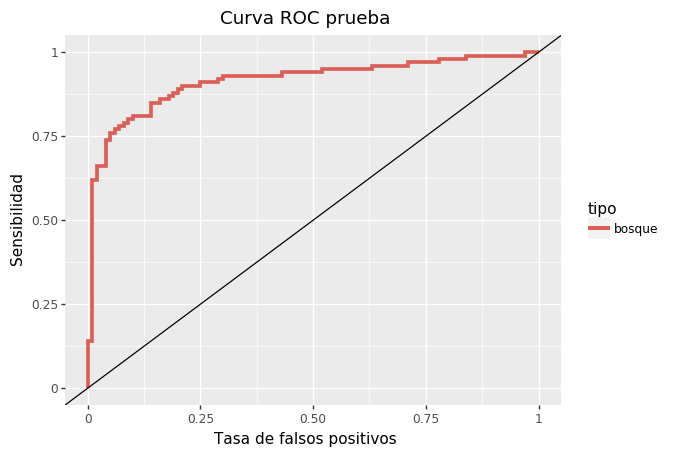

<ggplot: (-9223363287296172670)>

In [11]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
tfp, tvp, cortes = roc_curve(y[200:400], probas_bosque[:,1])
datos_roc = pd.DataFrame({"tfp":tfp, "tvp":tvp, "corte":cortes})
datos_roc["tipo"] = "bosque"
print("AUC prueba bosque:", roc_auc_score(y[200:400], probas_bosque[:,1]).round(3))
print("Log pérdida prueba bosque: ", log_loss(y[200:400], probas_bosque[:,1]).round(3))
(ggplot(datos_roc, aes("tfp", "tvp", group="tipo", colour="tipo")) 
  + geom_step(size=1.5)
  + geom_abline(slope=1, intercept=0)
  + xlab("Tasa de falsos positivos") + ylab("Sensibilidad")
  + labs(title ="Curva ROC prueba"))

Y podemos comparar con uno sólo de los árboles

AUC prueba arbol: 0.785


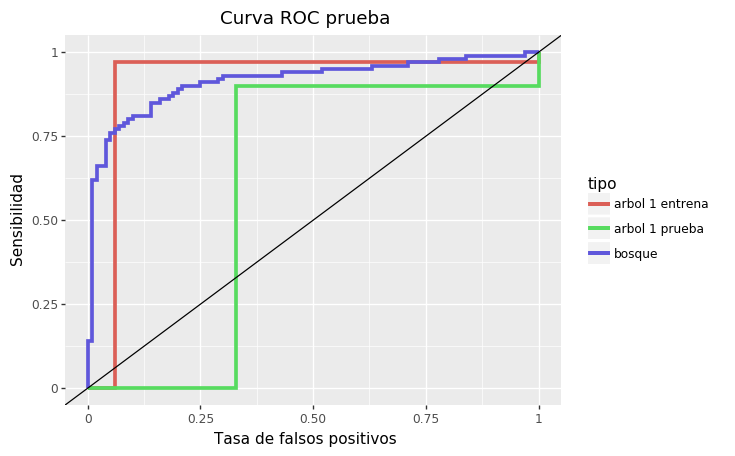

<ggplot: (8749558478312)>

In [12]:
probas_arbol = arboles[1].predict_proba(X[200:400, ])
tfp, tvp, cortes = roc_curve(y[200:400], probas_arbol[:,1])
datos_roc_2 = pd.DataFrame({"tfp":tfp, "tvp":tvp, "corte":cortes})
datos_roc_2["tipo"] = "arbol 1 prueba"

print("AUC prueba arbol:", roc_auc_score(y[200:400], probas_arbol[:,1]).round(3))
probas_arbol = arboles[1].predict_proba(X[0:200, ])
tfp, tvp, cortes = roc_curve(y[0:200], probas_arbol[:,1])
datos_roc_3 = pd.DataFrame({"tfp":tfp, "tvp":tvp, "corte":cortes})
datos_roc_3["tipo"] = "arbol 1 entrena"

datos_roc_total = pd.concat([datos_roc, datos_roc_2, datos_roc_3])
(ggplot(datos_roc_total, aes("tfp", "tvp", group="tipo", colour="tipo")) 
  + geom_step(size=1.5)
  + geom_abline(slope=1, intercept=0)
  + xlab("Tasa de falsos positivos") + ylab("Sensibilidad")
  + labs(title ="Curva ROC prueba"))

Cada árbol individual está severamente sobreajustado, pero el ensemble tiene buen desempeño.

## Ejercicio 2: datos de seguros

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
caravan = pd.read_csv('../datos/caravan-insurance-challenge.csv')
columnas = caravan.columns[2:86]
print(columnas)
def preprocesar_caravan(datos, tipo, columnas):
    # filtrar tipo
    datos_p = datos[datos["ORIGIN"] == tipo].copy()
    # variable respuesta
    y = datos_p["CARAVAN"].values
    datos_p = datos_p[columnas]
    datos_tipo = pd.get_dummies(datos_p.MOSHOOFD, prefix="MOSHOODFD_", drop_first = True)
    datos_p = datos_p.drop(columns = ["MOSHOOFD"])
    datos_p = pd.concat([datos_tipo, datos_p], axis = 1, sort=False)
    columnas_x = datos_p.columns
    #datos_origen = datos[datos["ORIGIN"] == tipo].drop(columns = ["ORIGIN"])
    X = datos_p.values
    return X, y, columnas_x
X_ent, y_ent, columnas_x = preprocesar_caravan(caravan, "train", columnas)
X_pr, y_pr, _ = preprocesar_caravan(caravan, "test", columnas)
print(X_ent.shape)
np.unique(y_ent, return_counts=True)

Index(['MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK', 'MGODPR',
       'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
       'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
       'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
       'APLEZIER', 'AFIETS', 'AINBOED',

(array([0, 1]), array([5474,  348]))

### Regresión logística (comparación)

Ajustamos y probamos regresión logística

In [14]:
from sklearn.linear_model import LogisticRegression
escalador = StandardScaler()
escalador_ajustado = escalador.fit(X_ent)
X_ent_esc = escalador_ajustado.transform(X_ent)
reg_caravan = LogisticRegression(penalty="l2", C=0.1)
reg_caravan_ajuste = reg_caravan.fit(X_ent_esc, y_ent)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
X_pr_esc = escalador_ajustado.transform(X_pr)
# calcular probabilidades
probas_reg  = reg_caravan_ajuste.predict_proba(X_pr_esc)
print("AUC prueba reg:", roc_auc_score(y_pr, probas_reg[:,1]).round(3))
print("Log pérdida reg: ", log_loss(y_pr, probas_reg[:,1]).round(3))

AUC prueba reg: 0.728
Log pérdida reg:  0.206


### Afinación de hiperparámetros y ajuste de bosque

Afinamos bosques. No es necesario reescalar variables como en regresión:

In [74]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, \
    auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, \
    average_precision_score

hiperparams_rejilla = {
    'min_samples_leaf': [10, 50, 100, 150],
    'max_features': [5, 10, 20, 40, 50, 60],
}

calificadores = {
    'auc': make_scorer(roc_auc_score, needs_proba=True),
    'neg_log_perdida': "neg_log_loss"
}

# usualmente el número de estimadores es más grande
bosque = RandomForestClassifier(n_estimators=400)
cortes_val = StratifiedKFold(n_splits=10, random_state=1228)
# busqueda
busqueda_grid = GridSearchCV(bosque, hiperparams_rejilla, 
                            scoring=calificadores, 
                            refit="auc", 
                            cv=cortes_val, n_jobs = -1)
busqueda_grid = busqueda_grid.fit(X_ent, y_ent)
print('Mejores parámetros para {}'.format("log perdida"))
print(busqueda_grid.best_params_)

Mejores parámetros para log perdida
{'max_features': 60, 'min_samples_leaf': 100}


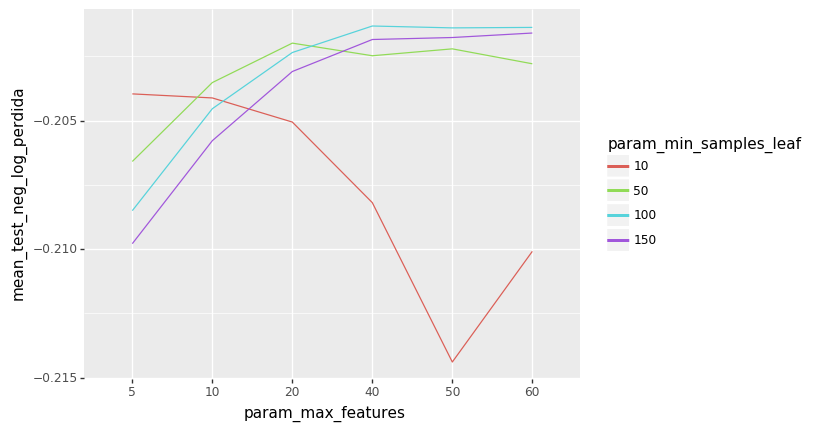

<ggplot: (-9223363287296361212)>

In [75]:
resultados = pd.DataFrame(busqueda_grid.cv_results_)
((ggplot(resultados, aes("param_max_features", "mean_test_neg_log_perdida", 
                         color = "param_min_samples_leaf", group="param_min_samples_leaf"))) +
geom_line())

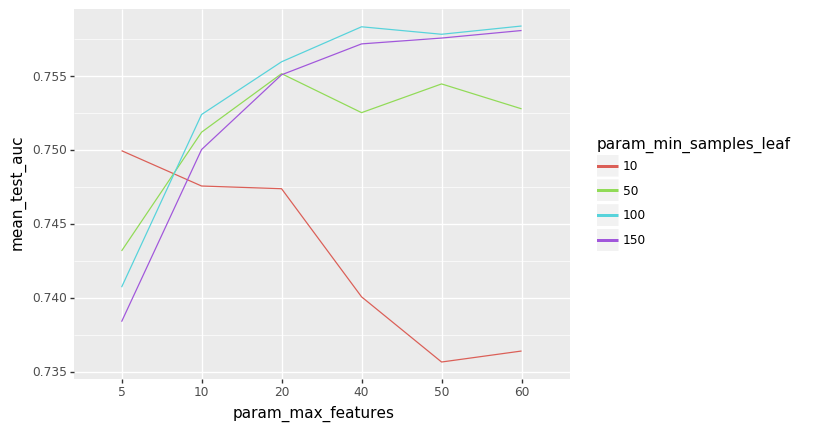

<ggplot: (8749565072718)>

In [76]:
((ggplot(resultados, aes("param_max_features", "mean_test_auc", 
                         color = "param_min_samples_leaf", group="param_min_samples_leaf"))) +
geom_line())

In [77]:
probas_bosque_2  = busqueda_grid.predict_proba(X_pr)
print("AUC prueba bosque:", roc_auc_score(y_pr, probas_bosque_2[:,1]).round(3))
print("Log pérdida bosque: ", log_loss(y_pr, probas_bosque_2[:,1]).round(3))

AUC prueba bosque: 0.728
Log pérdida bosque:  0.206


In [82]:
bosque_final = RandomForestClassifier(n_estimators=1500, min_samples_leaf=100, max_features=40, random_state = 822)
bosque_final = bosque_final.fit(X_ent, y_ent)
probas_bosque_final  = bosque_final.predict_proba(X_pr)

In [83]:
print("AUC prueba bosque:", roc_auc_score(y_pr, probas_bosque_final[:,1]).round(3))
print("Log pérdida bosque: ", log_loss(y_pr, probas_bosque_final[:,1]).round(3))

AUC prueba bosque: 0.728
Log pérdida bosque:  0.205
